In [1]:
# 이미지 띄우면서 검증하기
import numpy as np
import cv2 as cv
from typing import List
import sixtick.python.easy as s
import tensorflow as tf
models = tf.keras.models
layers = tf.keras.layers
tf.keras.backend.clear_session()


import os
model = models.load_model(r"C:\source\learning_kamp_vgg16.keras")
model.summary()

def list_all_files_with_paths(directory : str) -> List[str]:
    file_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            full_path = os.path.join(root, file)
            file_paths.append(full_path)
    return file_paths

def get_data_path_arr(is_train : bool = True) -> List[str]:
    import os
    import random
    directory_path_ok = r'C:\source\kamp_ex\train\ok'
    directory_path_bad = r'C:\source\kamp_ex\train\bad'
    if (not is_train) :
        directory_path_ok = r'C:\source\kamp_ex\test\ok'
        directory_path_bad = r'C:\source\kamp_ex\test\bad'
    image_path_arr = list_all_files_with_paths(directory_path_ok) + list_all_files_with_paths(directory_path_bad)
    random.shuffle(image_path_arr)
    return image_path_arr

loss_arr = []
accuracy_arr = []
predictions_arr = []
count = 100
delay = 100

image_path_arr = get_data_path_arr(False)
for i in range(count):
    x_org, y = s.cv.imread(image_path_arr[i]), np.array([not 'Error' in image_path_arr[i]])
    
    image_name = f'img_OK {i}'
    if not y :
        image_name = f'img_BAD {i}'
    
    # print(x_org)
    s.image_center_show(image_name, x_org)

    # x = s.cv.cvtColor(x_org, s.cv.COLOR_BGR2GRAY)
    # x = x.reshape(-1, 720, 480)
    x = x_org.reshape(-1, 720, 480, 3)
    
    # print(x.shape, y.shape)
    loss, accuracy = model.evaluate(x, y)
    predictions = model.predict(x)
    # print(loss , accuracy, predictions, y)
    print(round(loss, 1), round(accuracy,1), round(predictions[0][0],1), y)

    if accuracy == 1 and y[0] == True :
        cv.circle(x_org, (480//2,720//2), radius=150, thickness=20, color=(255,0,0)) # 원
    elif accuracy == 1 and y[0] == False: 
        cv.drawMarker(x_org, (480//2,720//2), color=(0,0,255), markerType=cv.MARKER_TILTED_CROSS, markerSize=300, thickness=20)
    else : 
        cv.drawMarker(x_org, (480//2,720//2), color=(0,255,0), markerType=cv.MARKER_STAR, markerSize=300, thickness=20)
    s.image_center_show(image_name, x_org)
    loss_arr.append(round(loss, 1))
    accuracy_arr.append(round(accuracy, 1))
    predictions_arr.append(round(predictions[0][0], 1))
    cv.waitKey(delay)

cv.destroyAllWindows()
print(np.mean(loss_arr), np.mean(accuracy_arr), np.mean(predictions_arr))


# C:\Users\hungh\AppData\Local\Programs\Python\Python37\py3_7_9_tfgpu\Scripts\activate
# python C:\source\kamp_ex\evaluate2.py

sixtick
	pytyon
		easy.py
easy.py loaded
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 22, 15, 512)       14714688  
                                                                 
 flatten (Flatten)           (None, 168960)            0         
                                                                 
 dense (Dense)               (None, 330)               55757130  
                                                                 
 dropout (Dropout)           (None, 330)               0         
                                                                 
 dense_1 (Dense)             (None, 165)               54615     
                                                                 
 dropout_1 (Dropout)         (None, 165)               0         
                                                                 
 dense_2 (Dense

- 이상징후 로스가 튀는데 예측이 틀림
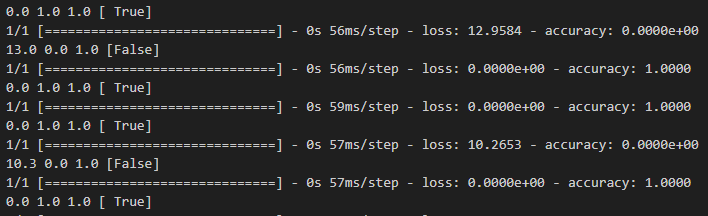